# Multi-membership data without outliers

In this notebook, we show that RTKM performs competitively with existing methods on multi-membership data without outliers. 

In [1]:
from RTKM import *
from ClusteringMethods import *
from AccuracyMeasures import *

import numpy as np
import pandas as pd
from scipy.io import arff
from sklearn.decomposition import PCA

# Emotions Dataset

In [2]:
data = arff.loadarff('datasets/emotions/emotions-train.arff')
df = pd.DataFrame(data[0])
array = df.to_numpy()
data = np.array(array[:, :-6], dtype = float)
labels = np.array(array[:, -6:], dtype = float)

data = data.T
labels = labels.T

Text(0.5, 1.0, 'Emotions Dataset Visualized Against Top 2 Principle Components')

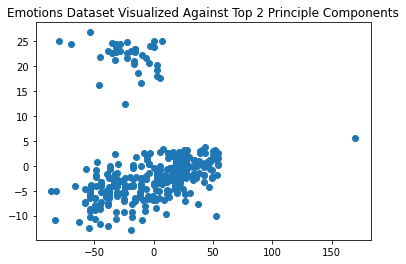

In [3]:
pca = PCA(n_components=3)
pca.fit(data.T)
Xnew = pca.transform(data.T)
Xnew = Xnew.T

plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.title('Emotions Dataset Visualized Against Top 2 Principle Components')



In [5]:
RTKM_yeast = RTKM(data)
RTKM_yeast.perform_clustering(k=6, percent_outliers = 0, max_iter = 1000, num_members = 2, init_centers = None)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = labels, pred_clusters = RTKM_yeast.weights, membership_option = 'multi')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores))






 Number of true positives:  [74, 61, 67, 43, 32, 22] 

 Number of false positives :  [101, 142, 43, 90, 74, 33] 

 Number of true negatives:  [171, 142, 180, 212, 222, 227] 

 Number of false negatives:  [45, 46, 101, 46, 63, 109] 

 F1 scores for each cluster:  [0.50340136 0.39354839 0.48201439 0.38738739 0.31840796 0.23655914] 

 Average F1 score:  0.3868864372502565


In [4]:
pred_labels_KMOR, pred_outliers_KMOR = run_kmor(data, k=6, percent_outliers= 0, gamma = 9, init_centers = None)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = labels, pred_clusters = pred_labels_KMOR, membership_option = 'multi')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores))






 Number of true positives:  [51, 23, 59, 30, 11, 20] 

 Number of false positives :  [38, 37, 29, 54, 26, 13] 

 Number of true negatives:  [234, 247, 194, 248, 270, 247] 

 Number of false negatives:  [68, 84, 109, 59, 84, 111] 

 F1 scores for each cluster:  [0.49038462 0.2754491  0.4609375  0.34682081 0.16666667 0.24390244] 

 Average F1 score:  0.3306935220201057


In [ ]:
pred_labels_NEO, pred_outliers_NEO = run_neo(data, path_to_neo='/Users/olgadorabiala/Documents/Thesis/RTKM/neo_k_means_vector/neo_kmeans/neo_kmeans.m'
        , k=6, percent_outliers=0, sigma= 1, init_centers = None)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = labels, pred_clusters = pred_labels_NEO, membership_option = 'multi')


print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores))





In [25]:
emotions_five_centers = np.load('emotions_five_centers.npy')

f1_avg_rtkm = []
f1_avg_kmor = []
f1_avg_neo = []

n = data.shape[1]
k=6

for i in range(5):
    init_centers = emotions_five_centers[i,:,:]

    #Run RTKM
    RTKM_yeast = RTKM(data)
    RTKM_yeast.perform_clustering(k=k, percent_outliers = 0, max_iter = 1000, num_members = 2, init_centers = init_centers)
    tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = labels, pred_clusters = RTKM_yeast.weights, membership_option = 'multi')
    f1_avg_rtkm.append(np.average(f1_scores))

    #Run KMOR
    pred_labels_KMOR, pred_outliers_KMOR = run_kmor(data, k=k, percent_outliers= 0, gamma = 9, init_centers = init_centers)
    tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = labels, pred_clusters = pred_labels_KMOR, membership_option = 'multi')
    f1_avg_kmor.append(np.average(f1_scores))
    
    #Run NEO
    pred_labels_NEO, pred_outliers_NEO = run_neo(data, path_to_neo='/Users/olgadorabiala/Documents/Thesis/RTKM/neo_k_means_vector/neo_kmeans/neo_kmeans.m'
        , k=k, percent_outliers=0, sigma= 1, init_centers = init_centers)
    tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = labels, pred_clusters = pred_labels_NEO, membership_option = 'multi')
    f1_avg_neo.append(np.average(f1_scores))




    _pyeval at line 57 column 30

***** iteration: 1, objective: 202129.707882
***** iteration: 2, objective: 172276.130127
***** iteration: 3, objective: 161346.742982
***** iteration: 4, objective: 160614.285604
***** iteration: 5, objective: 160539.188950
***** iteration: 6, objective: 160488.429723
***** iteration: 7, objective: 160195.936373
***** iteration: 8, objective: 159345.188093
***** iteration: 9, objective: 157672.648372
***** iteration: 10, objective: 155088.370322
***** iteration: 11, objective: 153572.517308
***** iteration: 12, objective: 150805.882348
***** iteration: 13, objective: 148890.182962
***** iteration: 14, objective: 147699.830476
***** iteration: 15, objective: 146709.640310
***** iteration: 16, objective: 146358.341414
***** iteration: 17, objective: 146218.531923
***** iteration: 18, objective: 146147.791956
***** iteration: 19, objective: 146133.406657
***** iteration: 20, objective: 146130.349510
***** iteration: 21, objective: 146130.349510
***** No.

In [26]:
print(np.max(f1_avg_rtkm), np.max(f1_avg_kmor), np.max(f1_avg_neo))

0.3992276797887295 0.3110705446152315 0.3728086248645856


# Yeast Dataset

Load the yeast dataset.  Data can be found at: http://mulan.sourceforge.net/datasets-mlc.html . This dataset contains 1500 instances with 103 numerical attributes. There are 14 classes, and the cardinality of the dataset is 4.237. 

In [31]:
yeast, meta = arff.loadarff('datasets/yeast/yeast.arff')
yeast_data = pd.DataFrame(yeast)
data = yeast_data.iloc[:,:-14].to_numpy().astype(float)
labels = yeast_data.iloc[:,-14:].to_numpy().astype(int)

data = data.T
labels = labels.T

Use PCA to visualize the Yeast data against its first two principle components. 

Text(0.5, 1.0, 'Yeast Dataset Visualized Against Top 2 Principle Components')

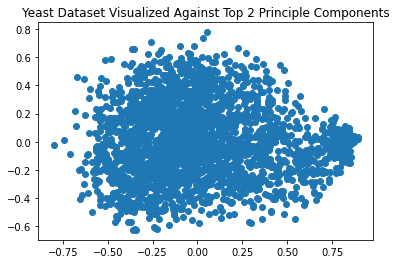

In [32]:
pca = PCA(n_components=3)
pca.fit(data.T)
Xnew = pca.transform(data.T)
Xnew = Xnew.T

plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.title('Yeast Dataset Visualized Against Top 2 Principle Components')


Load best initial centers for each method.

In [33]:
with open('saved_centers/centersRecord.npy', 'rb') as f:
    centers_record= np.load(f)



# Run RTKM 

Run Robust Trimmed k Means on the yeast dataset with $k=14$, $\alpha = 0$, and $s = 4$.  Return Accuracy Metrics for RTKM. 

In [65]:
RTKM_yeast = RTKM(data)
RTKM_yeast.perform_clustering(k=14, percent_outliers = 0, max_iter = 1000, num_members = 4, init_centers = centers_record[:,:,4].T)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = labels, pred_clusters = RTKM_yeast.weights, membership_option = 'multi')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores))




Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations


 Number of true positives:  [337, 413, 512, 333, 251, 196, 176, 184, 23, 92, 71, 630, 619, 4] 

 Number of false positives :  [466, 386, 406, 276, 270, 462, 524, 610, 498, 715, 508, 236, 198, 432] 

 Number of true negatives:  [1189, 993, 1028, 1279, 1425, 1358, 1465, 1327, 1741, 1449, 1620, 365, 420, 1951] 

 Number of false negatives:  [425, 625, 471, 529, 471, 401, 252, 296, 155, 161, 218, 1186, 1180, 30] 

 F1 scores for each cluster:  [0.43067093 0.44964616 0.53866386 0.45275323 0.40386163 0.3123506
 0.31205674 0.288854   0.0658083  0.17358491 0.16359447 0.46979866
 0.47324159 0.01702128] 

 Average F1 score:  0.3251361671572145


# Run KMOR

Run KMOR on the Yeast dataset with $k=9$, $\alpha = 0$, and $\gamma = 9$ and return accuracy metrics.

In [66]:
pred_labels_KMOR, pred_outliers_KMOR = run_kmor(data, k=14, percent_outliers= 0, gamma = 9, init_centers = centers_record[:,:,2].T)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = labels, pred_clusters = pred_labels_KMOR, membership_option = 'multi')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores))





 Number of true positives:  [105, 92, 173, 92, 137, 66, 54, 58, 18, 17, 10, 116, 176, 1] 

 Number of false positives :  [96, 90, 114, 98, 15, 38, 140, 165, 121, 156, 101, 33, 25, 110] 

 Number of true negatives:  [1559, 1289, 1320, 1457, 1680, 1782, 1849, 1772, 2118, 2008, 2027, 568, 593, 2273] 

 Number of false negatives:  [657, 946, 810, 770, 585, 531, 374, 422, 160, 236, 279, 1700, 1623, 33] 

 F1 scores for each cluster:  [0.21806854 0.15081967 0.27244094 0.17490494 0.31350114 0.18830243
 0.17363344 0.16500711 0.11356467 0.07981221 0.05       0.11806616
 0.176      0.0137931 ] 

 Average F1 score:  0.1577081681798351


# Run Neo-k-means
Run NEO k means with $k = 9$, $\alpha = 0$, and $\beta = 3$ on the Yeast dataset and return accuracy metrics. 

In [67]:
pred_labels_NEO, pred_outliers_NEO = run_neo(data, path_to_neo='/Users/olgadorabiala/Documents/Thesis/RTKM/neo_k_means_vector/neo_kmeans/neo_kmeans.m'
        , k=14, percent_outliers=0, sigma= 3, init_centers = None)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = labels, pred_clusters = pred_labels_NEO, membership_option = 'multi')


print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores))




    _pyeval at line 57 column 30

***** iteration: 1, objective: 8913.841064
***** iteration: 2, objective: 8581.476331
***** iteration: 3, objective: 8442.217492
***** iteration: 4, objective: 8325.317472
***** iteration: 5, objective: 8238.204097
***** iteration: 6, objective: 8187.851545
***** iteration: 7, objective: 8166.195724
***** iteration: 8, objective: 8155.821695
***** iteration: 9, objective: 8149.541232
***** iteration: 10, objective: 8145.418485
***** iteration: 11, objective: 8142.521891
***** iteration: 12, objective: 8140.636850
***** iteration: 13, objective: 8138.735746
***** iteration: 14, objective: 8137.551855
***** iteration: 15, objective: 8136.554768
***** iteration: 16, objective: 8135.471745
***** iteration: 17, objective: 8134.631350
***** iteration: 18, objective: 8133.984730
***** iteration: 19, objective: 8133.469301
***** iteration: 20, objective: 8132.952301
***** iteration: 21, objective: 8132.323753
***** iteration: 22, objective: 8131.571366
***** i

# Compare F1 scores

In [39]:
f1_avg_rtkm = []
f1_avg_kmor = []
f1_avg_neo = []

n = data.shape[1]
k=14

for i in range(5):
    init_centers = centers_record[:,:,i].T #data[:, np.random.choice(n, k)]

    #Run RTKM
    RTKM_yeast = RTKM(data)
    RTKM_yeast.perform_clustering(k=14, percent_outliers = 0, max_iter = 1000, num_members = 4, init_centers = init_centers)
    tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = labels, pred_clusters = RTKM_yeast.weights, membership_option = 'multi')
    f1_avg_rtkm.append(np.average(f1_scores))

    #Run KMOR
    pred_labels_KMOR, pred_outliers_KMOR = run_kmor(data, k=14, percent_outliers= 0, gamma = 9, init_centers = init_centers)
    tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = labels, pred_clusters = pred_labels_KMOR, membership_option = 'multi')
    f1_avg_kmor.append(np.average(f1_scores))
    
    #Run NEO
    pred_labels_NEO, pred_outliers_NEO = run_neo(data, path_to_neo='/Users/olgadorabiala/Documents/Thesis/RTKM/neo_k_means_vector/neo_kmeans/neo_kmeans.m'
        , k=14, percent_outliers=0, sigma= 3, init_centers = init_centers)
    tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = labels, pred_clusters = pred_labels_NEO, membership_option = 'multi')
    f1_avg_neo.append(np.average(f1_scores))



Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

***** iteration: 1, objective: 8520.457187
***** iteration: 2, objective: 8333.877612
***** iteration: 3, objective: 8282.661565
***** iteration: 4, objective: 8247.233118
***** iteration: 5, objective: 8228.023757
***** iteration: 6, objective: 8218.299086
***** iteration: 7, objective: 8214.180155
***** iteration: 8, objective: 8211.745120
***** iteration: 9, objective: 8210.355887
***** iteration: 10, objective: 8209.158695
***** iteration: 11, objective: 8208.221194
***** iteration: 12, objective: 8207.285502
***** iteration: 13, objective: 8206.154965
***** iteration: 14, objective: 8204.969963
***** iteration: 15, objective: 8203.510539
***** iteration: 16, objective: 8202.346216
***** iteration: 17, objective: 8201.438041
***** iteration: 18, objective: 8200.587989


***** Total no. of data points: 2417
***** alpha: 3.000, alphaN: 7251
***** beta: 0.000, betaN: 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

***** iteration: 1, objective: 8541.324156
***** iteration: 2, objective: 8350.204383
***** iteration: 3, objective: 8313.640697
***** iteration: 4, objective: 8296.476186
***** iteration: 5, objective: 8284.946015
***** iteration: 6, objective: 8269.583939
***** iteration: 7, objective: 8242.699095
***** iteration: 8, objective: 8216.712142
***** iteration: 9, objective: 8203.630101
***** iteration: 10, objective: 8199.465723
***** iteration: 11, objective: 8197.913451
***** iteration: 12, objective: 8196.859496
***** iteration: 13, objective: 8196.163091
***** iteration: 14, objective: 8195.728524
***** iteration: 15, objective: 8195.357889
***** iteration: 16, objective: 81

***** iteration: 82, objective: 8174.097306
***** iteration: 83, objective: 8174.090176
***** iteration: 84, objective: 8174.082019
***** iteration: 85, objective: 8174.063495
***** iteration: 86, objective: 8174.056622
***** iteration: 87, objective: 8174.050268
***** iteration: 88, objective: 8174.037677
***** iteration: 89, objective: 8174.025790
***** iteration: 90, objective: 8174.017825
***** iteration: 91, objective: 8174.012393
***** iteration: 92, objective: 8174.010238
***** iteration: 93, objective: 8174.010238
***** No. of iterations done: 93
***** Total no. of data points: 2417
***** alpha: 3.000, alphaN: 7251
***** beta: 0.000, betaN: 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations


/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

***** iteration: 1, objective: 8668.141545
***** iteration: 2, objective: 8479.234728
***** iteration: 3, objective: 8425.325496
***** iteration: 4, objective: 8391.806671
***** iteration: 5, objective: 8373.025449
***** iteration: 6, objective: 8361.869833
***** iteration: 7, objective: 8354.668807
***** iteration: 8, objective: 8350.281194
***** iteration: 9, objective: 8347.244647
***** iteration: 10, objective: 8344.860991
***** iteration: 11, objective: 8343.323748
***** iteration: 12, objective: 8342.472394
***** iteration: 13, objective: 8341.806001
***** iteration: 14, objective: 8341.243999
***** iteration: 15, objective: 8340.701280
***** iteration: 16, objective: 8340.270185
***** iteration: 17, objective: 8339.910151
***** iteration: 18, objective: 8339.505076
***** iteration: 19, objective: 8339.203178
***** iteration: 20, objective: 8338.892108
***** iteration: 21, objective: 8338.474091
***** iteration: 22, objective: 8337.814002
***** i

In [40]:
print(np.max(f1_avg_rtkm), np.max(f1_avg_kmor), np.max(f1_avg_neo))

0.3251361671572145 0.16642213678668796 0.29857642409466695


# Scene Dataset

Load the scene dataset from http://mulan.sourceforge.net/datasets-mlc.html.  Dataset contains 1211 instances with 294 numerical attributes each. There are 6 classes and the cardinality of the dataset is 1.074.

In [41]:
# scene, meta = arff.loadarff('datasets/scene/scene-train.arff')
scene, meta = arff.loadarff('datasets/scene/scene.arff')
scene_data = pd.DataFrame(scene)
data = scene_data.iloc[:,:-6].to_numpy().astype(float)
labels = scene_data.iloc[:,-6:].to_numpy().astype(int)

data = data.T
labels = labels.T

Use PCA to visualize the Scene dataset against it's top 2 principle components.

Text(0.5, 1.0, 'Scene Dataset Visualized Against Top 2 Principle Components')

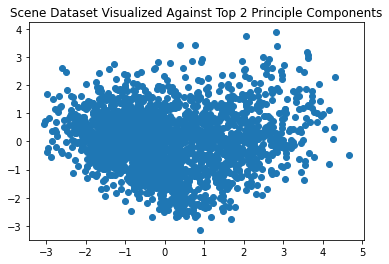

In [57]:
pca = PCA(n_components=2)
pca.fit(data.T)
Xnew = pca.transform(data.T)
Xnew = Xnew.T

plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.title('Scene Dataset Visualized Against Top 2 Principle Components')



Load the best initial centers for each method.

In [42]:
with open('saved_centers/centerRecordScene.npy', 'rb') as f:
    centers_record_scene= np.load(f)

Run RTKM with $k = 6$, $\alpha = 0$, and $s = 1$.  Return accuracy metrics.

In [59]:
RTKM_yeast = RTKM(data)
RTKM_yeast.perform_clustering(k=6, percent_outliers = 0, max_iter = 1000, num_members = 1, init_centers = centers_record_scene[:,:,1].T)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = labels, pred_clusters = RTKM_yeast.weights, membership_option = 'multi')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores))





Iteration 100
Iteration 200
Iteration 300


 Number of true positives:  [248, 198, 294, 322, 227, 170] 

 Number of false positives :  [220, 33, 75, 93, 359, 168] 

 Number of true negatives:  [1760, 2010, 1935, 1881, 1515, 1808] 

 Number of false negatives:  [179, 166, 103, 111, 306, 261] 

 F1 scores for each cluster:  [0.55418994 0.66554622 0.76762402 0.75943396 0.40571939 0.44213264] 

 Average F1 score:  0.5991076963133094


Run KMOR with $k=6$, $\alpha = 0$, and $\gamma = 9$.  Return accuracy metrics.

In [60]:
pred_labels_KMOR, pred_outliers_KMOR = run_kmor(data, k=6, percent_outliers= 0, gamma = 9, init_centers = centers_record_scene[:,:,1].T)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = labels, pred_clusters = pred_labels_KMOR, membership_option = 'multi')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores))






 Number of true positives:  [248, 198, 294, 322, 227, 170] 

 Number of false positives :  [220, 33, 75, 93, 359, 168] 

 Number of true negatives:  [1760, 2010, 1935, 1881, 1515, 1808] 

 Number of false negatives:  [179, 166, 103, 111, 306, 261] 

 F1 scores for each cluster:  [0.55418994 0.66554622 0.76762402 0.75943396 0.40571939 0.44213264] 

 Average F1 score:  0.5991076963133094


Run NEO k means with $k=6$, $\alpha = 1$, and $\beta = 0$. 

In [61]:
pred_labels_NEO, pred_outliers_NEO = run_neo(data, path_to_neo='/Users/olgadorabiala/Documents/Thesis/RTKM/neo_k_means_vector/neo_kmeans/neo_kmeans.m'
        , k=6, percent_outliers=0, sigma = 1, init_centers = centers_record_scene[:,:,3].T)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = labels, pred_clusters = pred_labels_NEO, membership_option = 'multi')


print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores))





    _pyeval at line 57 column 30

***** iteration: 1, objective: 36023.659467
***** iteration: 2, objective: 31784.701718
***** iteration: 3, objective: 31323.498111
***** iteration: 4, objective: 31131.409071
***** iteration: 5, objective: 30979.392242
***** iteration: 6, objective: 30854.017083
***** iteration: 7, objective: 30762.118717
***** iteration: 8, objective: 30718.521630
***** iteration: 9, objective: 30691.883935
***** iteration: 10, objective: 30677.189966
***** iteration: 11, objective: 30670.138597
***** iteration: 12, objective: 30667.039705
***** iteration: 13, objective: 30665.591095
***** iteration: 14, objective: 30664.299678
***** iteration: 15, objective: 30663.469125
***** iteration: 16, objective: 30662.999415
***** iteration: 17, objective: 30662.775932
***** iteration: 18, objective: 30662.553258
***** iteration: 19, objective: 30662.423620
***** iteration: 20, objective: 30662.341104
***** iteration: 21, objective: 30662.309911
***** iteration: 22, objective